In [ ]:
import numpy as np
import sklearn
import pandas as pd
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Part1**

### **hierarchical clustering**

first of all let's talk about proximity matrix


proximity matrix:A square matrix in which the entry in cell (j, k) is some measure of the similarity (or distance) between the items to which row j and column k correspond

Hierarchical clustering is one of the popular and easy to understand clustering technique. This clustering technique is divided into two types:

Agglomerative

Divisive

Agglomerative Hierarchical clustering Technique: In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward.

Compute the proximity matrix
Let each data point be a cluster
Repeat: Merge the two closest clusters and update the proximity matrix
Until only a single cluster remains
Key operation is the computation of the proximity of two clusters

To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.

Step- 1: In the initial step, we calculate the proximity of individual points and consider all the six data points as individual clusters as shown in the image below.

Step- 2: In step two, similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F.

Step- 3: We again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.

Step- 4: Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.

Step- 5: Finally, all the clusters are merged together and form a single cluster.


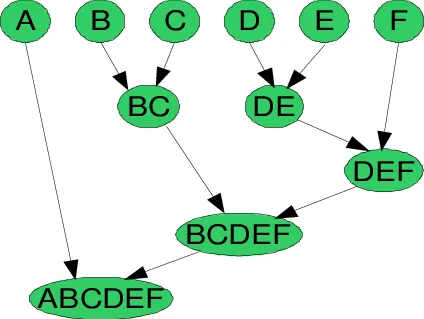

The Hierarchical clustering Technique can be visualized using a Dendrogram.





we have a divise hierarchical clustering which is not used much.it is the opposite of the method we said.first it assumes all the data points in one cluster then extract the points which are not similar

Ward´s linkage is a method for hierarchical cluster analysis . The idea has much in common with analysis of variance (ANOVA). The linkage function specifying the distance between two clusters is computed as the increase in the “error sum of squares” (ESS) after fusing two clusters into a single cluster.

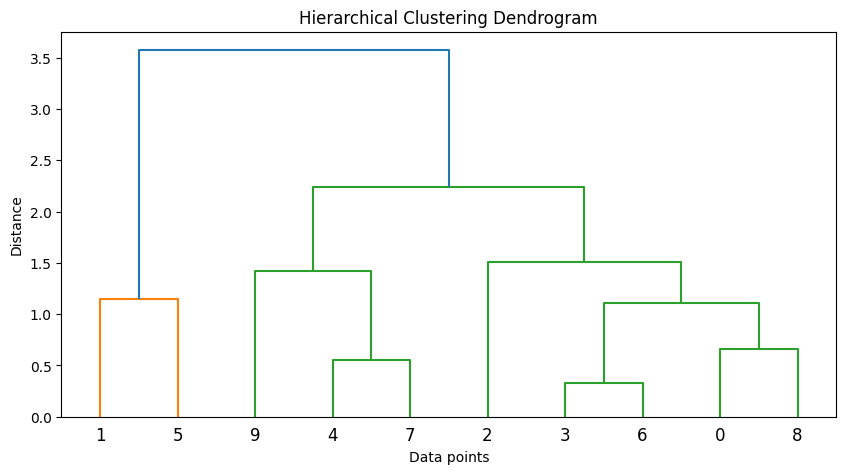

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(0)
X = np.random.randn(10, 2)

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

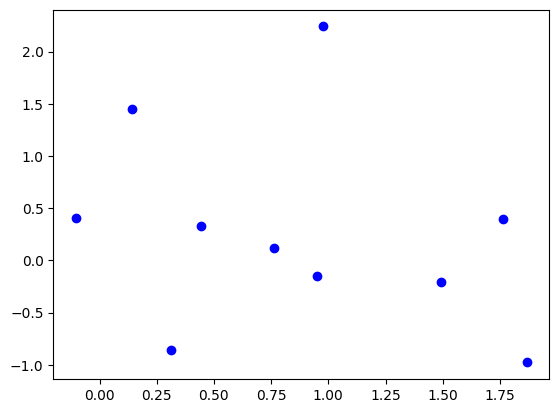

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Data Points')


### **DBSCAN**

Initially, it starts with a random unvisited starting data point. All points within a distance ‘Ɛ’ classify as neighborhood points.
It needs a minimum number of ‘minPts’ points within the neighborhood to start the clustering process. Otherwise, the point gets labeled as ‘Noise.’
All points within the distance ‘Ɛ’ become part of the same cluster. Repeat the procedure for all the new points added to the cluster group. Continue till it visits and labels each point within the ‘Ɛ’ neighborhood of the cluster.
On completion of the process, it starts again with a new unvisited point thereby leading to the discovery of more clusters or noise. At the end of the process, you ensure that you mark each point as either cluster or noise.

sometimes in clustering a cluster wraps around another cluster.Using k-means clustering to cluster this may get wrong results

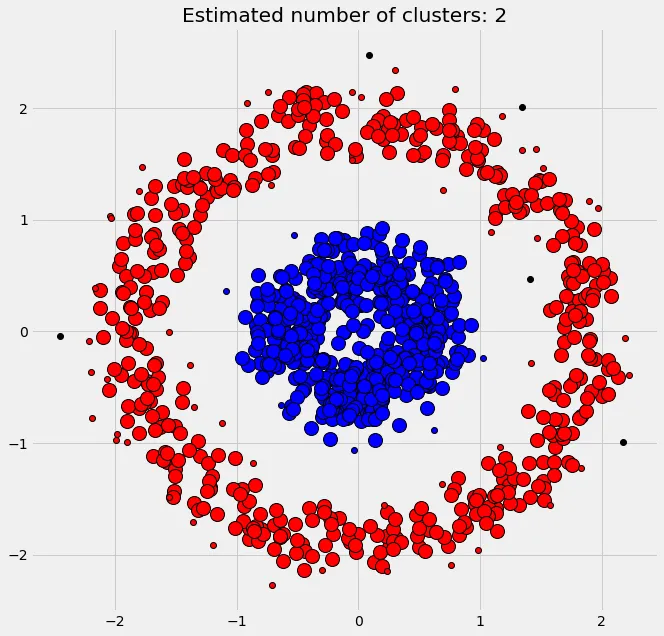

using make_blobs i made a dataset and standard scale them

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.3, random_state=0
)

X = StandardScaler().fit_transform(X)

I plotted the map to show a good representation of numbers

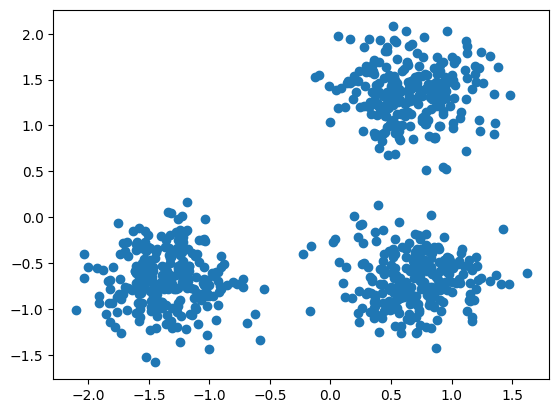

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

i used dbscan here.I used the std number in last part for minimum epsilon

In [ ]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 8


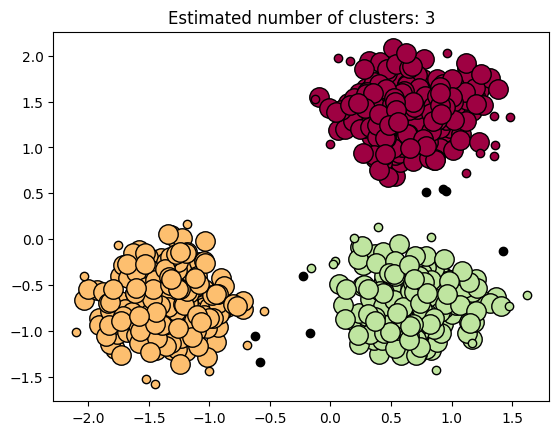

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **comparing clustering methods**

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import tensorflow as tf

Loading data using pandas dataframe:

In [ ]:
investors_df=pd.read_excel("/content/drive/MyDrive/UnSup-Data-2024.xlsx")

In [ ]:
investors_df.head()

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5


i drop rows which has nan value

In [ ]:
investors_df.dropna(axis="rows")

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,3862,3,1,1,1,3,1,4,0,2,3,1,3
3862,3863,3,1,1,1,3,1,4,0,2,3,1,4
3863,3864,5,1,1,0,5,1,4,0,3,5,1,4
3864,3865,2,4,1,7,3,1,3,1,3,2,5,5


I drop Id column because it has nothing to do with our clustering

In [ ]:
investors_df=investors_df.drop("ID",axis="columns")

Here i used elbow method.I calculate error for clusters range from 1 to 20.then i plot the map

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

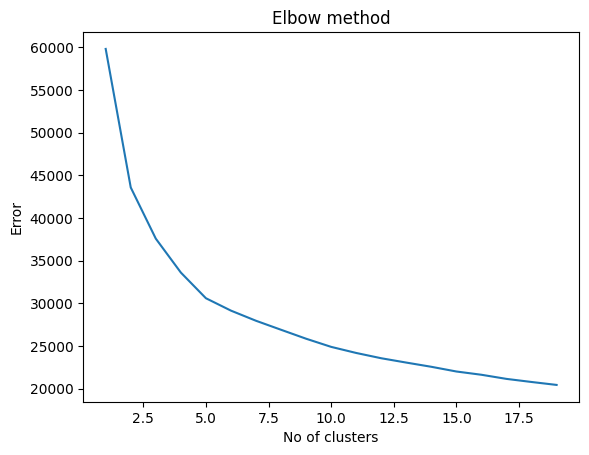

In [ ]:
Error =[]
for i in range(1, 20):
    kmeans = sk.cluster.KMeans(n_clusters = i).fit(investors_df)
    kmeans.fit(investors_df)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 20), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

the best clusters was two.so i used two clusters here

In [ ]:
kmeans2 = sk.cluster.KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(investors_df)
print(y_kmeans2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 0 ... 1 0 0]


to evaluate the model i used silhoute score

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(investors_df,y_kmeans2)

print("The average silhouette coefficient is:", silhouette_avg)

The average silhouette coefficient is: 0.2544089264150241


here is my model using db scan

DBSCAN

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=6)  # Adjust eps and min_samples according to your data
dbscan.fit(investors_df)

# Get the cluster labels assigned by DBSCAN
d=dbscan.labels_

In [ ]:
np.unique(d)

array([-1,  0])

in the other two methods we will be careful that we won'e have one cluster but in dbscan we may have one cluster and then we can not calculate silhoutte score so we should be careful.so i checked it before calculating the score

In [ ]:
from sklearn.metrics import silhouette_score
if(len(np.unique(d))==1):
  print("there is just one cluster")
else:
  silhouette_avg = silhouette_score(investors_df,dbscan.labels_)

  print("The average silhouette coefficient is:", silhouette_avg)

The average silhouette coefficient is: 0.34190045601564156


I printed the correlation matric to have a better view of data

<Axes: title={'center': 'Correlation Matrix'}>

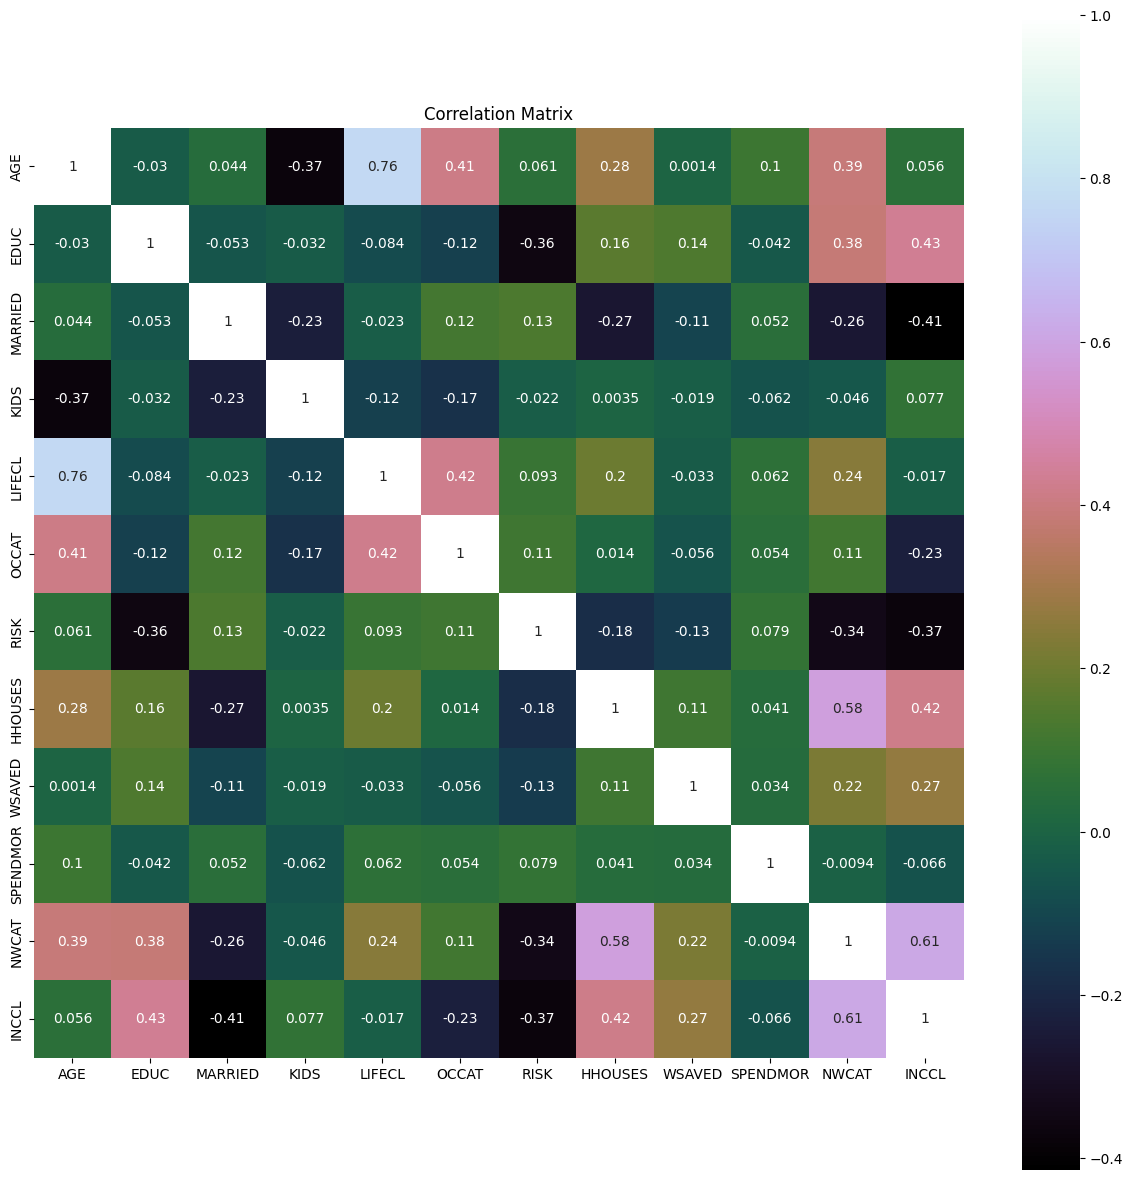

In [ ]:
import seaborn as sns
correlation = investors_df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

here first i calculated the distance matrix.i put the linkage to ward and i printed the corresponding dendogram

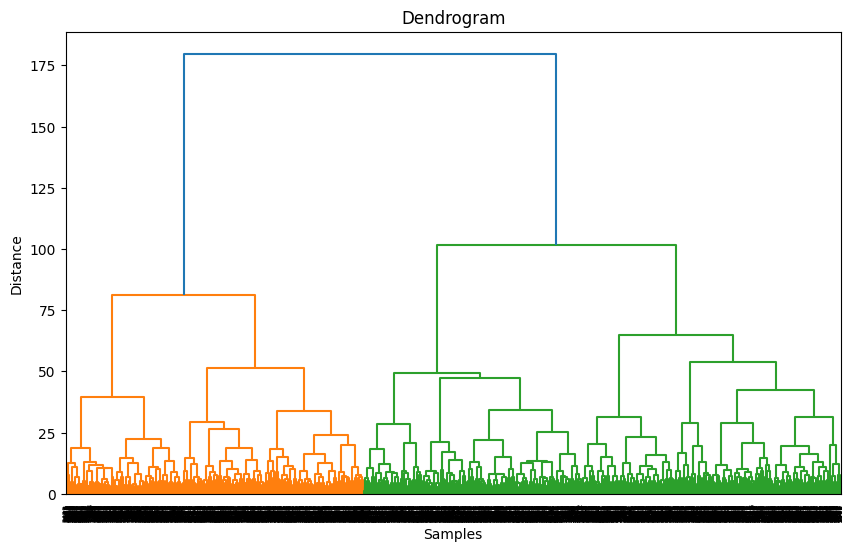

In [ ]:
import scipy.cluster.hierarchy as sch
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe

# Calculate the pairwise distances between data points
distance_matrix = sch.distance.pdist(investors_df)

# Perform hierarchical clustering
linkage_matrix = sch.linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

i used two methods to determine the number of clusters.i used silhoutte score and i used the sdistance between the clusters

here i measured the sillhoute score for different numbers of clusters . and pick one which has the most sillhoute score.

maxclust tries to find its minimum distance between pairs so that points in same clusters are closer to each other than to other points in other clusters

In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
num_clusters = 0
for num_clusters in range(2,20):
# Assign samples to clusters based on a given number of clusters
  cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

  # Calculate the silhouette score
  silhouette_avg = silhouette_score(investors_df, cluster_labels)

  # Print the silhouette score
  print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.25301872802863845
Silhouette Score: 0.1849415246010444
Silhouette Score: 0.15407841351223106
Silhouette Score: 0.13983037919219
Silhouette Score: 0.14456429246951175
Silhouette Score: 0.1376227304440769
Silhouette Score: 0.12965093851825732
Silhouette Score: 0.12761275619353002
Silhouette Score: 0.12667848822385383
Silhouette Score: 0.11598305142487075
Silhouette Score: 0.10771631808056133
Silhouette Score: 0.10654758527038896
Silhouette Score: 0.10085732527196031
Silhouette Score: 0.10002607638508419
Silhouette Score: 0.09773246082869921
Silhouette Score: 0.10233822323666075
Silhouette Score: 0.10180259585263426
Silhouette Score: 0.1028778085457971


### **Part2:**

I later use this function to print and visualize the  classification report.first i make the classification report using predicted labels and true labels.then i make the classification report using sklearn function and at last i visualize it.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
def make_report(y_test, y_pred,target_labels,model):
# Generate the classification report
  #y_test=np.argmax(y_test, axis=1)
  y_pred=model.predict(X_test)
  #y_pred = np.argmax(y_pred_probs, axis=1)
  report = classification_report(y_test, y_pred, target_names=target_labels, output_dict=True)
  report_df = pd.DataFrame(report).transpose()
  return report_df

def print_report(report_df):
  plt.figure(figsize=(8, 5))
  sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
  plt.title("Classification Report")
  plt.xlabel("Metrics")
  plt.ylabel("Classes")
  plt.show()

### **Gini impurity index:**

The Gini impurity index is a measure of impurity or disorder used in decision tree algorithms, such as CART (Classification and Regression Trees). It quantifies how well a dataset of categorical target variables is split into different classes.

The Gini impurity index is calculated for a particular node in the decision tree and is defined as follows:

Gini impurity index = 1 - (sum of squared probabilities of each class)

Mathematically, if we have K classes, the Gini impurity index for a node is calculated as:

Gini impurity index = 1 - ∑(p_i^2)

where p_i represents the probability of an instance belonging to class i.

The Gini impurity index ranges from 0 to 1, where 0 indicates a pure node (all instances belong to the same class) and 1 indicates maximum impurity (an equal distribution of instances across all classes).

In decision tree algorithms, the Gini impurity index is used to evaluate the quality of a split by measuring the impurity reduction achieved by splitting the data based on a particular attribute or feature. When constructing a decision tree, the goal is to find attribute splits that minimize the Gini impurity index, resulting in pure or homogeneous subsets at each node.

By recursively applying the Gini impurity index to evaluate and select the best attribute splits, decision tree algorithms can create a tree-based model that separates the data into meaningful and distinct classes based on the features available.

### **Mathematical example of gini impurity index:**

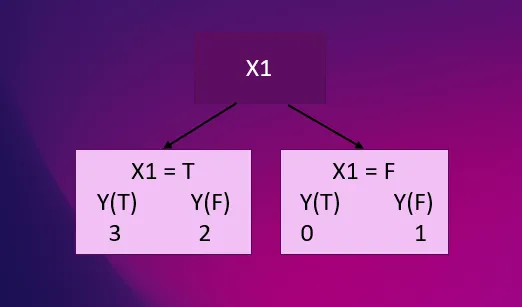

Geni impurity for the left node = 1 — (3/(3+2))² — (2/(3+2))² = 0.49

Geni impurity for the right node = 1 — (0/(0+1))² — (1/(0+1))² = 0

Once the Gini Impurity is calculated for each leaf node, the total Gini Impurity can be calculated by taking the weighted average of the two individual impurities.

Total impurity = 0.49(5/(5+1)) + 0(1/(5+1)) = 0.408

## **coding example**

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


i loaded wine data set from sk learn

In [ ]:
wine = load_wine()
X, y = wine.data, wine.target


i used test train split to split the data in to traing and testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

i make a decision tree classifier object

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

I trained the model

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

i predicted the labels using the trained model

In [ ]:
y_pred = clf.predict(X_test)

i printed classification report

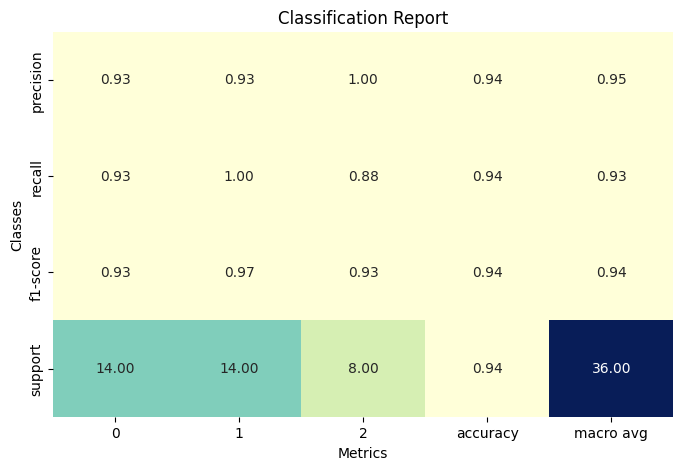

In [ ]:
print_report(make_report(y_test, y_pred,list(np.unique(y_train)),clf))

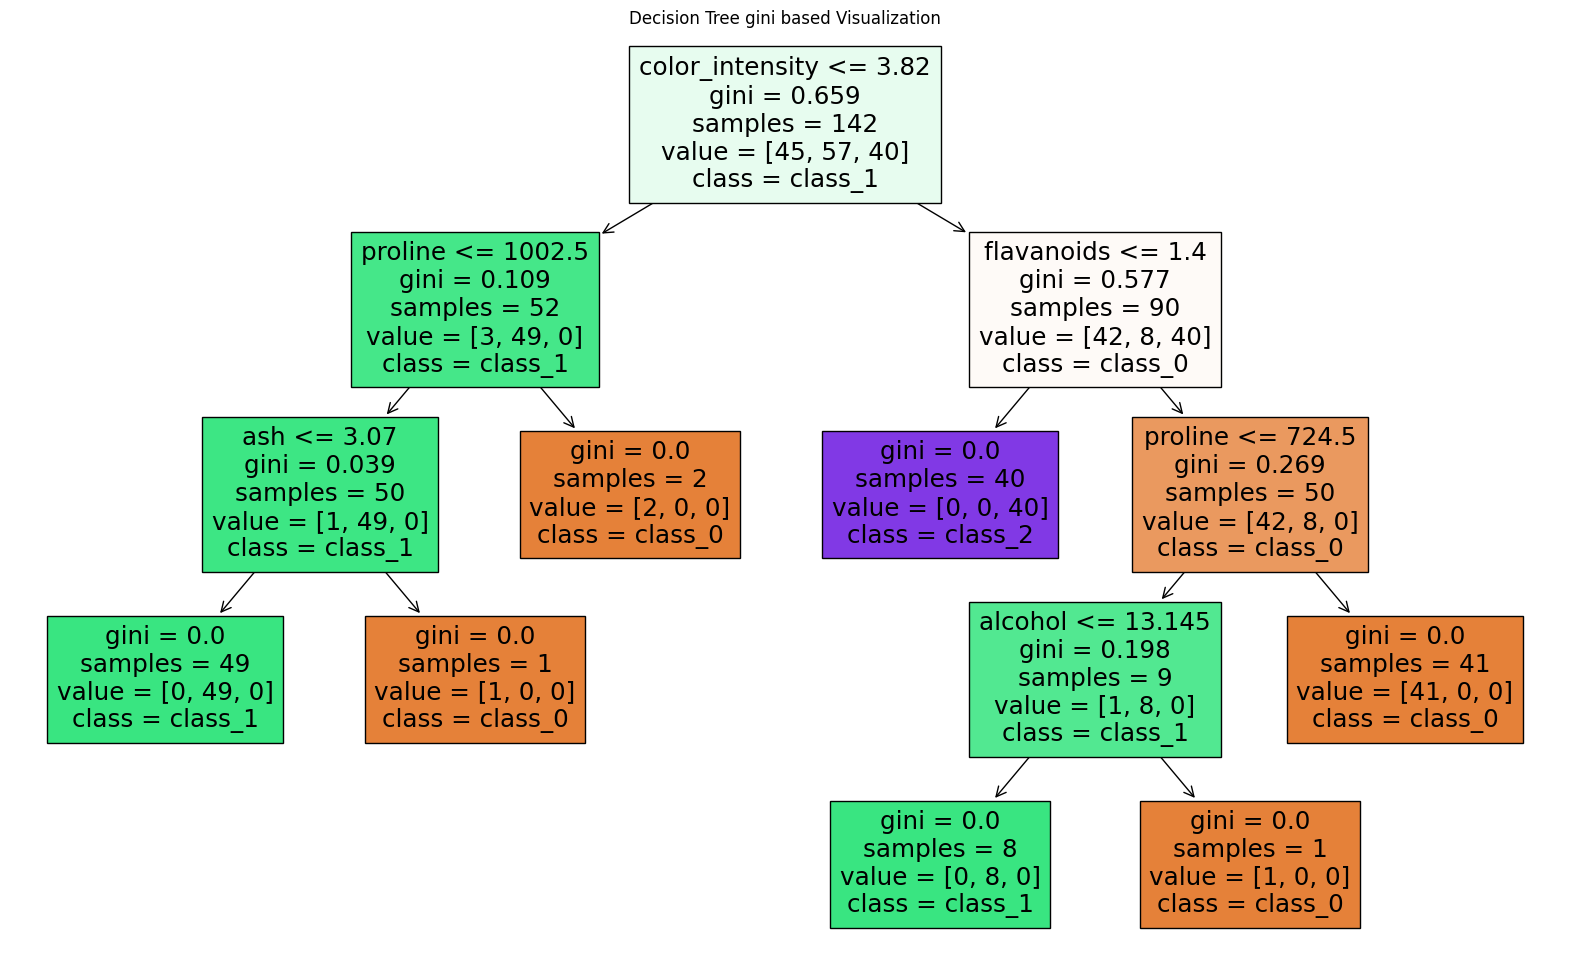

In [ ]:
from sklearn.tree import  plot_tree
plt.figure(figsize=(20, 12))

plot_tree(clf, filled=True, feature_names= wine.feature_names, class_names=wine.target_names)
plt.title("Decision Tree gini based Visualization")
plt.show()

### **Comparing gini based and entropy based tree in case of being balanced**

Here i used a dataset and used gini impurity as metrcis for the tree.

In [ ]:
from sklearn.model_selection import train_test_split

I loaded one of the sklearn built in datasets.it is breast cancer data.
breast cancer dataset:
The breast cancer dataset imported from scikit-learn contains 569 samples with 30 real, positive features (including cancer mass attributes like mean radius, mean texture, mean perimeter, et cetera). Of the samples, 212 are labeled “malignant” and 357 are labeled “benign”.

In [ ]:
import numpy as np
import pandas as pd
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
from sklearn.datasets import load_breast_cancer

# Load the Diabetes dataset
cancer = load_breast_cancer()

# Access data and target
X, y = cancer.data, cancer.target



Here i splited X and y using train test split .I gave a constant random state because I didn't want the data change every time i run the model.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Then I loaded Decision tree classifier and I set the criterion to gini.
I used .fit to train the model.

In [ ]:
best_dt = DecisionTreeClassifier( random_state=42)
best_dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

I wanted to show the classification report so I used .predict to provide the predicted labels.

In [ ]:
y_pred = best_dt.predict(X_test)

Here I printed the classification report to have a better look at our model.as you can see both f1 score and accuracy is high,.

this is my function for printing classification report.first i make a classification report using my predicted labels and my true labels.i cast it to a dataframe then i printrd it.

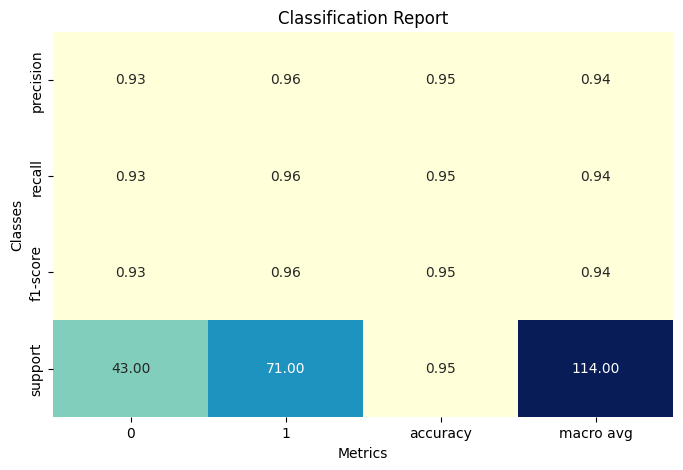

In [ ]:
print_report(make_report(y_test, y_pred,list(np.unique(y_train)),best_dt))

For have a better visualization of tree and later compare the tree for being balanced I used plot_tree from sklearn.I passed the features and target names to plot tree.

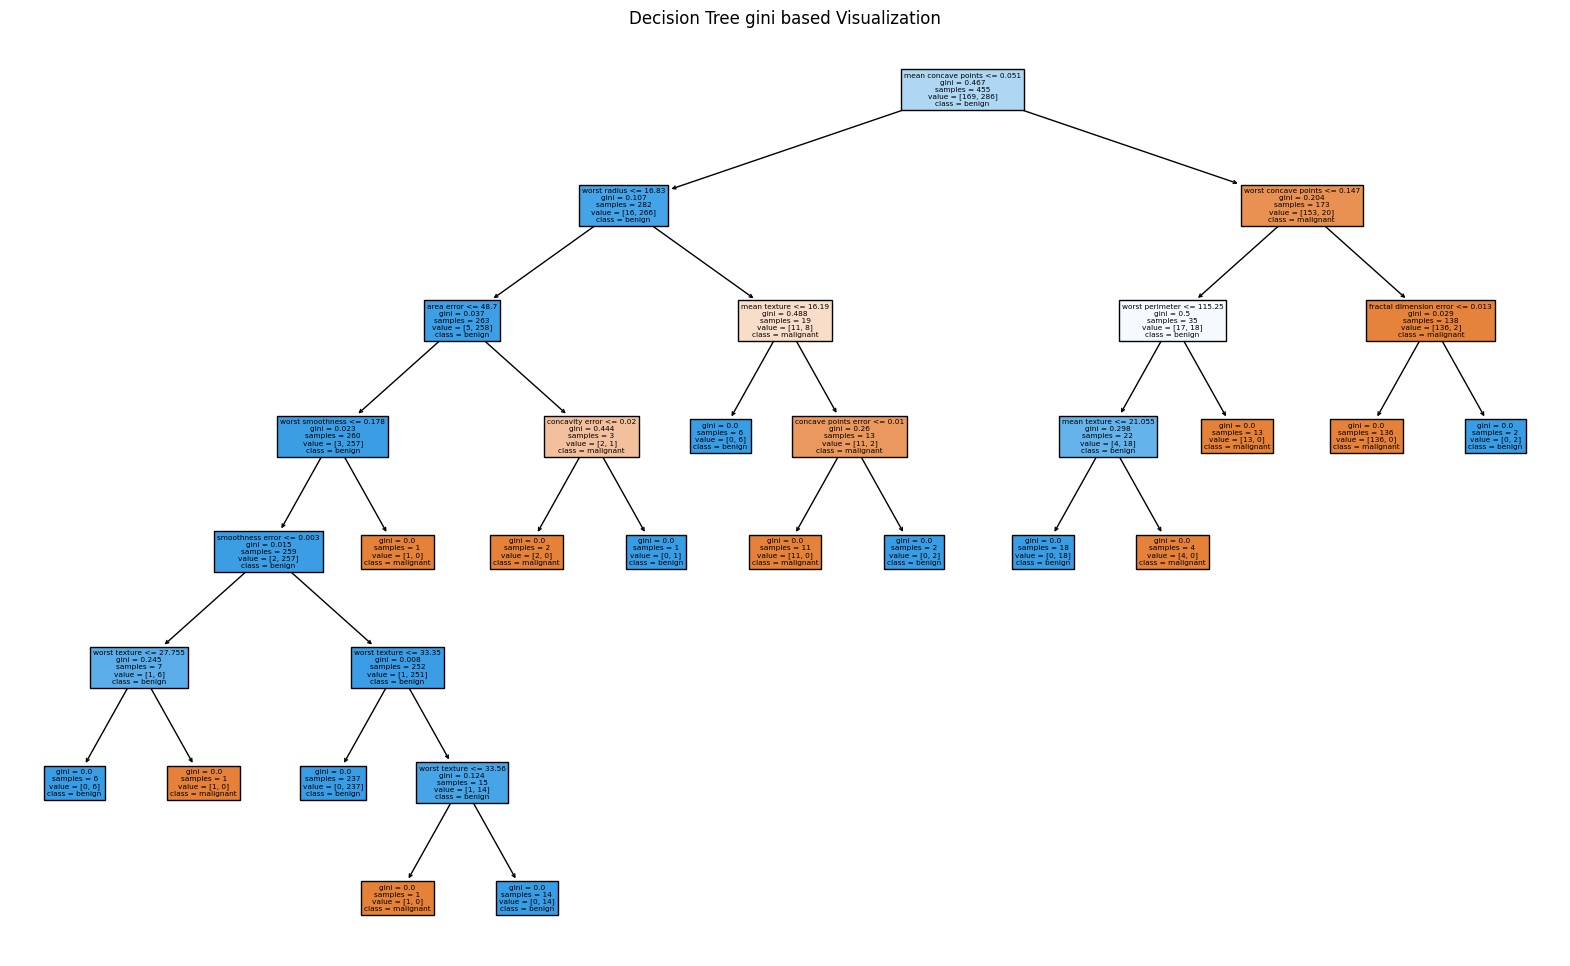

In [ ]:
from sklearn.tree import  plot_tree
plt.figure(figsize=(20, 12))
plot_tree(best_dt, filled=True, feature_names= cancer.feature_names, class_names=cancer.target_names)
plt.title("Decision Tree gini based Visualization")
plt.show()

here i set the criterion to entropy.note that default criterion is gini in decision tree classifiers




In [ ]:
best_dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
best_dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

because I wanted to print the classification report I passed the .predict to provide me with predicted labels.

In [ ]:
y_pred = best_dt_entropy.predict(X_test)

Here i used print report to print the classification report.

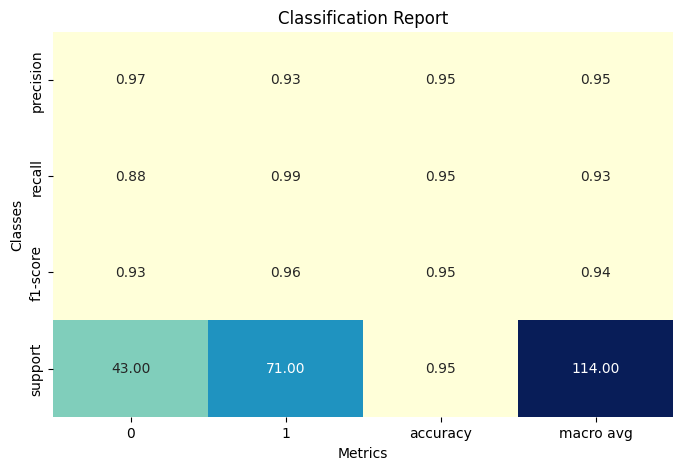

In [ ]:
print_report( make_report(y_test, y_pred,list(np.unique(y_train)),best_dt_entropy))

I printed the tree to see that it is more balanced than the gini based tree.

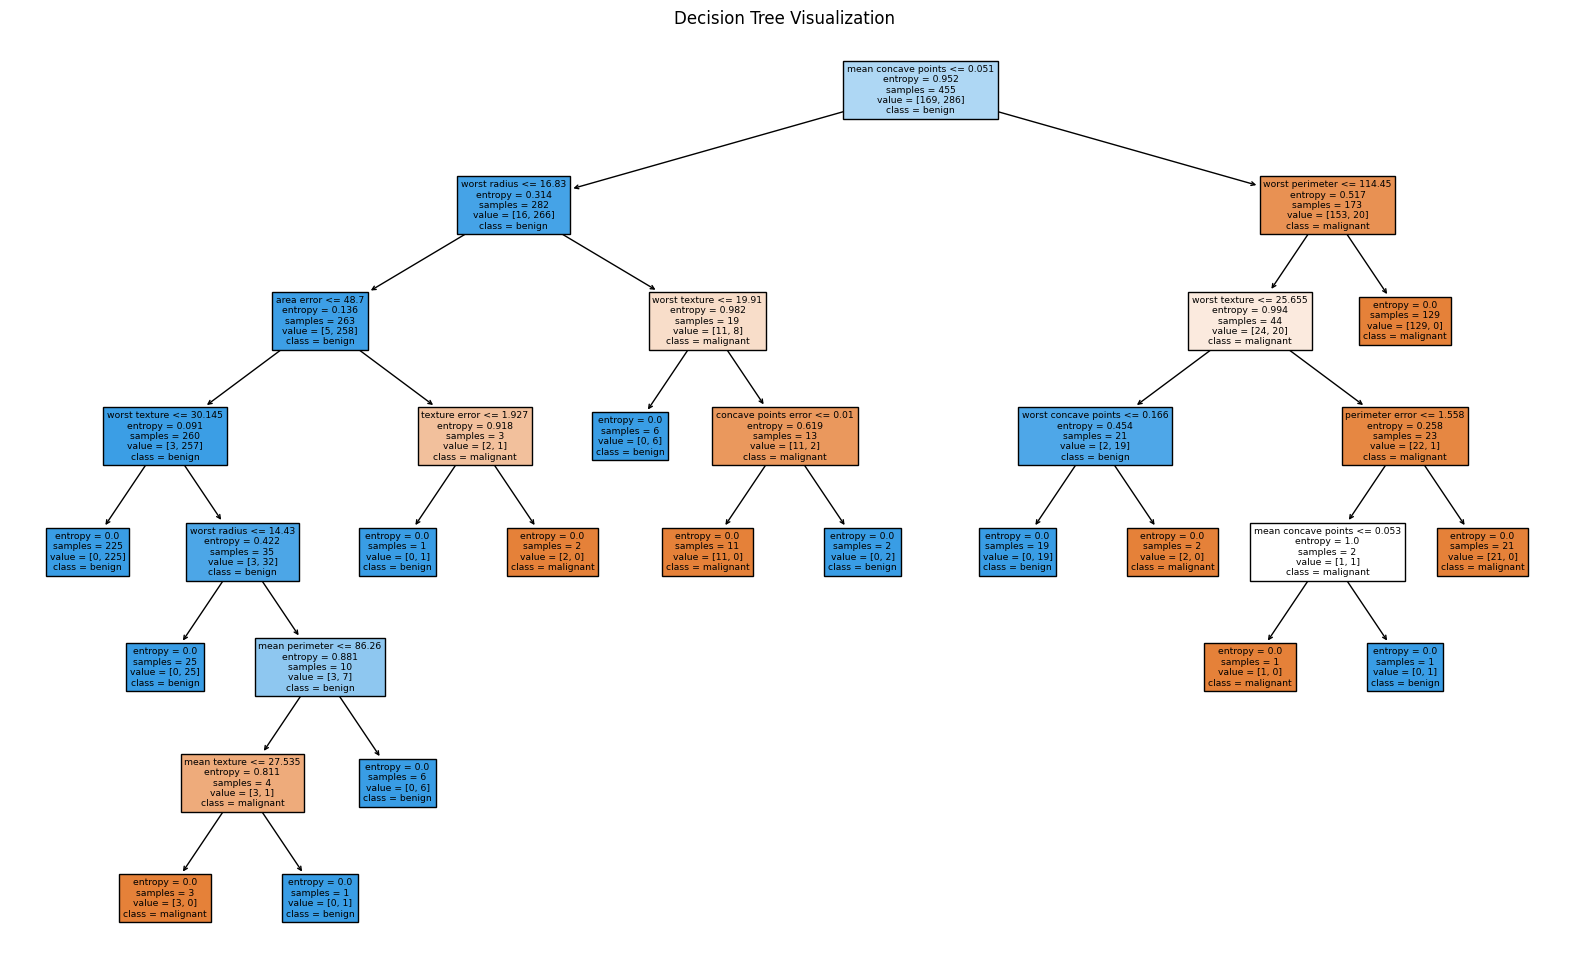

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(20, 12))
plot_tree(best_dt_entropy, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names)
plt.title("Decision Tree Visualization")
plt.show()

### **Training the model for assignment 1 dataset**

Here i loaded the dataset

In [ ]:
dataset_assignement1=pd.read_csv("/content/drive/MyDrive/Assignment 1-Dataset.csv")

I printed the head to check the dataset

In [ ]:
dataset_assignement1.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F86,F87,F88,F89,F90,F91,F92,Target,Unnamed: 93,Unnamed: 94
0,1,7,2,29,2,6,0,0,0,81,...,0,66,6401,4,21.0,0,2,2,NaN,NaN
1,1,28,0,42,2,4,0,0,0,14,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
2,1,7,0,42,2,4,0,0,0,10,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
3,1,28,0,42,2,4,0,0,0,11,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
4,2,7,0,42,2,6,0,0,0,13,...,36,63,3413,4,15.0,36,1,2,NaN,NaN


using sklearn standard scaler we standard scaler the data .

In [ ]:
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
def normalize_dataset(dataset):
  scaler = StandardScaler()

  # Fit the scaler to the data
  scaler.fit(dataset)

  # Perform standardization on the DataFrame
  df_standardized = scaler.transform(dataset)

  # Convert the standardized array back to a DataFrame
  dataset = pd.DataFrame(df_standardized, columns=dataset.columns)
  return dataset

I seperated the target and assign them to y_data.I drop the rows and columns that has a non value.Then I return X and y

In [ ]:
def seperateXy(dataset):
  y_data=dataset.Target
  dataset=dataset.drop(["Target"],axis=1)

  dataset=dataset.dropna(axis='columns')
  dataset=dataset.dropna(axis='rows')
  x_data=dataset
  return x_data,y_data

The dataset is imbalanced so we use SMOTE to oversample the dataset

In [ ]:
from imblearn.over_sampling import SMOTE
def apply_smote(X_data,y_data):
  smote = SMOTE()

# Apply SMOTE to the dataset
  X_resampled, y_resampled = smote.fit_resample(X_data, y_data)
  return X_resampled,y_resampled

This is preprocess phase.I seperated X and y.I normalize the dataset and oversample the data

In [ ]:
X_data,y_data=seperateXy(dataset_assignement1)
X_data=normalize_dataset(X_data)
X_resampled,y_resampled=apply_smote(X_data,y_data)

I used test train split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.05, random_state=42)


I used randomized search from sklearn to find the best hyper parameters for this model.I used decision tree classifier for this problem.

we have parameter dist which has the parameter that I want to adjust for acquiring a better model.
max_depth:maximum depth of my tree

min sample split:how man sample I shoud see to splut the node

min sample leaf:how many sample we have for setting the leaf

criterion:which is constatnt here and it is entropy

max_feature:
In scikit-learn, the max_features parameter determines the number of features to consider when looking for the best split in decision trees. Here are the details:

If max_features is an integer, it considers that many features at each split.
If max_features is a float, it treats it as a fraction and selects max(1, int(max_features * n_features_in_)) features at each split.
The options for max_features include:
"sqrt": It sets max_features to the square root of the total number of features.
"log2": It sets max_features to the base-2 logarithm of the total number of features.
None: In this case, all features are considered.


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
param_dist = {
   # 'n_estimators': [50, 100, 200],  # Experiment with different values
    'max_depth': [None, 10, 20,5,15,1],     # Adjust as needed
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

    'criterion':['entropy',"gini"]

}

# Initialize Random Forest classifier
dt_model =DecisionTreeClassifier(random_state=42)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(
   dt_model , param_distributions=param_dist, n_iter=20, cv=10, scoring='accuracy', random_state=42
)
random_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = random_search.best_params_
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [ ]:
y_pred = best_dt.predict(X_test)

here i printed the report

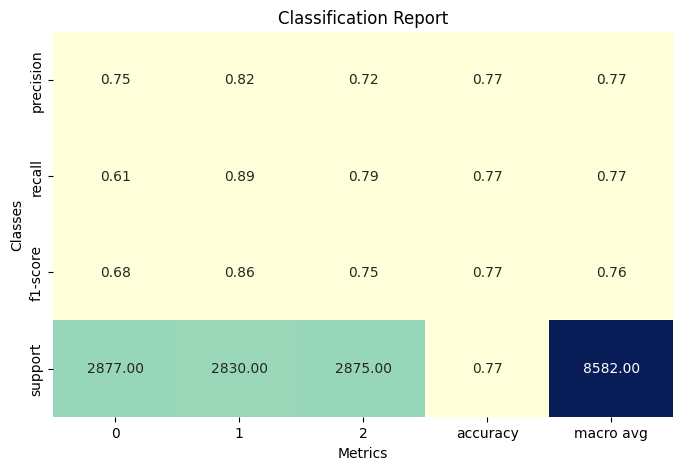

In [ ]:
print_report( make_report(y_test, y_pred,list(np.unique(y_train)),best_dt))

In [ ]:
best_params

{'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 15,
 'criterion': 'gini'}

here i did the same for a random forest classifier.using randomized search i fine tuned the model.I train the model and predicted some labels for it.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],  # Experiment with different values
    'max_depth': [None, 10, 20],     # Adjust as needed
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

    'bootstrap': [True, False]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42
)
random_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = random_search.best_params_
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = best_rf.predict(X_test)

I printed the report

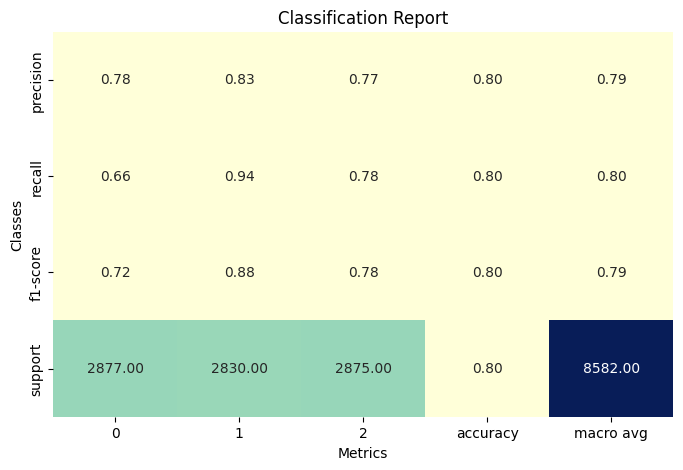

In [ ]:

print_report( make_report(y_test, y_pred,list(np.unique(y_train)),best_rf))

### **Regression tree and forests**

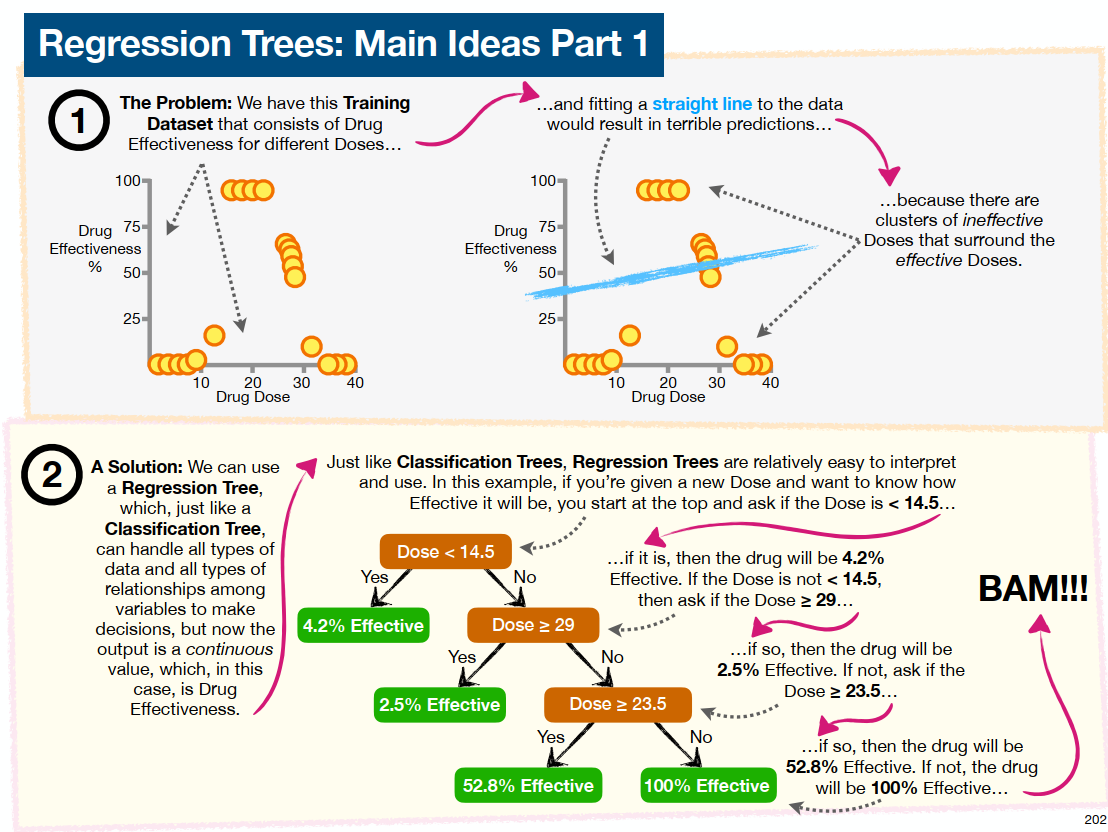

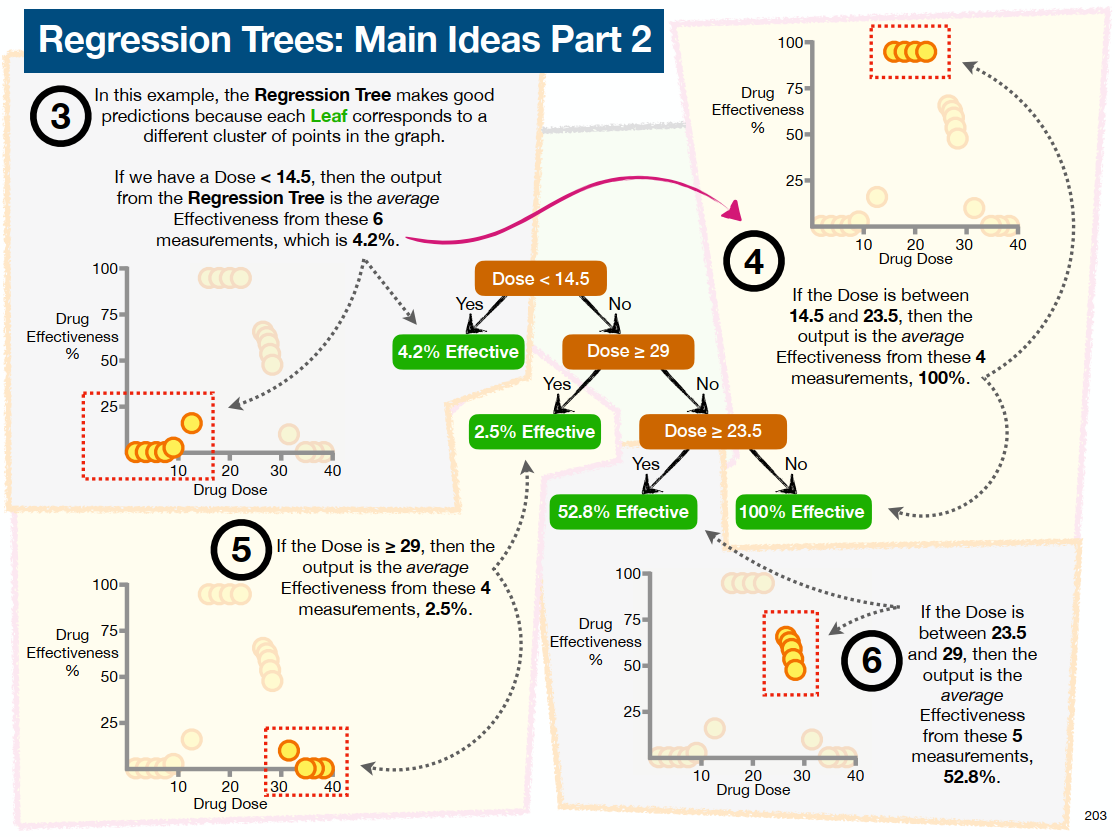

### **Boston dataset**

I loaded the data using the guidline sklearn provided

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

i did test train split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

here i make a decision tree regressor and i train the model

In [ ]:
dt_regression = DecisionTreeRegressor()

dt_regression.fit(X_train,y_train)



DecisionTreeRegressor()

this function calculate three metric.mean absolute error,mean squared error and r2 score and print them

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def print_regression_metrics(y_pred,y_test):
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  print(f"R2-score: {r2:.4f}")
  print(f"Mean Absolute Error (MAE): {mae:.4f}")
  print(f"Mean Squared Error (MSE): {mse:.4f}")
  print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

I predicted the labels and pass them to print regression metrics

In [ ]:
y_pred = dt_regression.predict(X_test)
print_regression_metrics(y_pred,y_test)

R2-score: 0.8394
Mean Absolute Error (MAE): 2.5824
Mean Squared Error (MSE): 11.7759
Root Mean Squared Error (RMSE): 3.4316


I didn't get good results for the random forest regressor at first so i fine tune the model here.

then i trained the model with best parameters and provide the predicted labels

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regression = RandomForestRegressor()
# n_estimators =number of decision trees in forest
param_distributions = {
    'n_estimators': [50,100,150, 200,250, 300],  # Number of trees
    'max_depth': [None, 10, 20],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10], # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]    # Minimum samples required for a leaf node
}
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(
    estimator=rf_regression,
    param_distributions=param_distributions,
    n_iter=100,  # Number of random combinations to try
    cv=5,        # Cross-validation folds
    scoring='r2',
    n_jobs=-1    # Use all available cores
)

rf_random .fit(X_train, y_train)
best_params =rf_random.best_params_
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = best_rf.predict(X_test)

# Make predictions

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


here i printed the regression report.

In [ ]:
print_regression_metrics(y_pred,y_test)

R2-score: 0.8815
Mean Absolute Error (MAE): 2.0308
Mean Squared Error (MSE): 8.6929
Root Mean Squared Error (RMSE): 2.9484


## **Part3**

In [ ]:
!pip install qiskit==0.45.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.6 MB/s eta 0:00:00


In [ ]:
from qiskit import *
from qiskit.visualization import *

In [ ]:
!pip install pylatexenc==2.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.8/157.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.7-py3-none-any.whl size=130757 sha256=8a5f1e2eb720267f7ddcd2bfc202f2273e800a9384004cb7d09a736743657224
  Stored in directory: /root/.cache/pip/wheels/55/5e/bf/f7bc2fdf17af8585f4462afb89d69b632f829b9d87c4ea653a
Successfully built pylatexenc


In [ ]:
from pylatexenc import *

In [ ]:
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.4 MB/s eta 0:00:00


In [ ]:
from qiskit.visualization import circuit_drawer

In [ ]:
from qiskit_aer import Aer

In [ ]:
backend = Aer.get_backend('statevector_simulator')

The Essence of Basis Encoding:
In quantum computing, basis encoding involves representing quantum states using a specific set of basis states. The choice of basis states depends on the problem at hand and the desired operations to be performed. By encoding information in a suitable basis, quantum algorithms can efficiently manipulate quantum states and perform computations.

Basis States:
Basis states are the building blocks of quantum information encoding. In the context of qubits, the two most commonly used basis states are the computational basis states |0⟩ and |1⟩. These states form the foundation for representing quantum information and performing quantum operations.

Let’s walk through the process of basis encoding the number “110” using Qiskit. Basis encoding involves mapping classical data (in this case, binary data) to quantum states by encoding it into the basis states of a quantum system.

Setup:
We’ll use a quantum circuit with 3 qubits to represent the basis states.
The basis states for a 3-qubit system are:
|000⟩
|001⟩
|010⟩
|011⟩
|100⟩
|101⟩
|110⟩
|111⟩

Encoding “110”:

To encode the binary number “110,” we’ll set the quantum state to |110⟩.
Here are the steps: a. Initialize the quantum circuit:

. Set the quantum state to |110⟩:

In [ ]:
# Apply X-gates to the relevant qubits
# Create a 2-qubit quantum circuit
qc = QuantumCircuit(3)
qc.x(0)  # Flip qubit 1
qc.x(1)  # Flip qubit 2


Measure the quantum state

In [ ]:
# Measure all qubits
qc.measure_all()


Simulate the circuit to obtain measurement results:

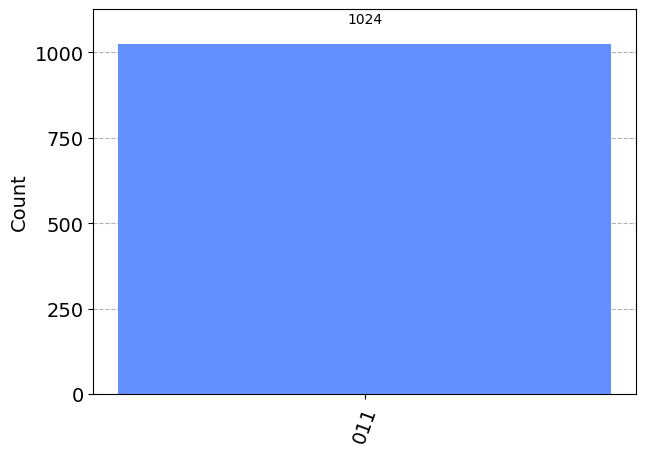

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)
result = job.result()
counts = result.get_counts(qc)
# Visualize the measurement results
plot_histogram(counts)

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


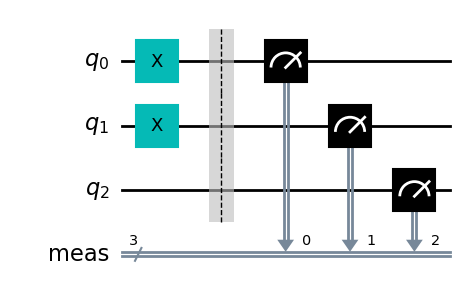

In [ ]:
qc.draw("mpl")


### **amplitude encoding**

 let's try to explain amplitude encoding in quantum computing using simple language.

Imagine you have a jar with some little balls inside. Each ball represents a piece of information, like a number or a letter. In classical computing, we would just have a bunch of jars, each with one ball in it - that would be like having a bunch of 1s and 0s.

But in quantum computing, we can have a single jar with multiple balls inside, and the balls can be in different positions at the same time. The positions of the balls represent the information.

The cool thing is that we can also control how much of each ball is in each position. This is what we call "amplitude encoding."

Let's say we have a jar with two balls - one ball represents the number 0 and the other ball represents the number 1. If we have the 0 ball all the way at the bottom of the jar and the 1 ball all the way at the top, that would be like having a regular 0 or 1 in a classical computer.

But we can also have the 0 ball halfway up the jar and the 1 ball halfway up the jar. That would be like having a mix of 0 and 1, with both of them being equally likely.

We can even have the 0 ball three-quarters of the way up the jar and the 1 ball one-quarter of the way up the jar. That would be like having mostly 0 with a little bit of 1 mixed in.

This is what amplitude encoding is all about - controlling the "amount" or "amplitude" of each possible value in the quantum system. It lets us represent much more information in a single jar than we could with just one ball per jar.

let's explain the code.

first we normalize our x's.we need 2 qubits to represent this because we have 4 numbers.

we initialize each qubit with normalized number that we calculated.

we simulate the circuit for 1024 time and plot the histogram

at last using draw we deaw the ciscuit.

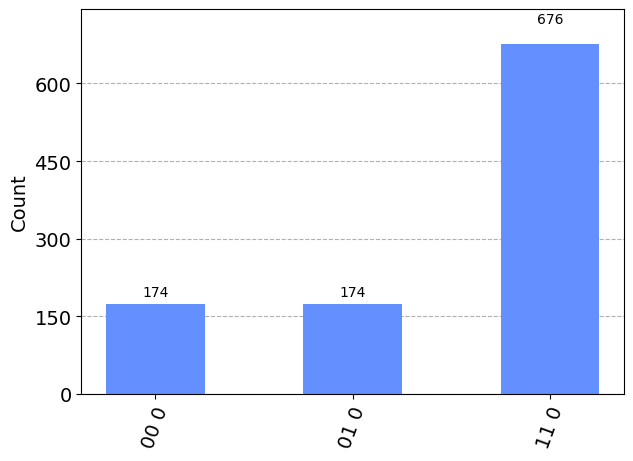

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
x = [1, 1, 0, 2]
# Create a 2-qubit quantum circuit
import numpy as np

state = (1 / np.sqrt(6)) * np.array(x)




from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

q=QuantumRegister(2)
c=ClassicalRegister(1)
qc = QuantumCircuit(q, c)


qc.initialize(state, [0, 1])

# Measure the quantum state
qc.measure_all()

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)
result = job.result()
counts = result.get_counts(qc)

# Visualize the measurement results
plot_histogram(counts)


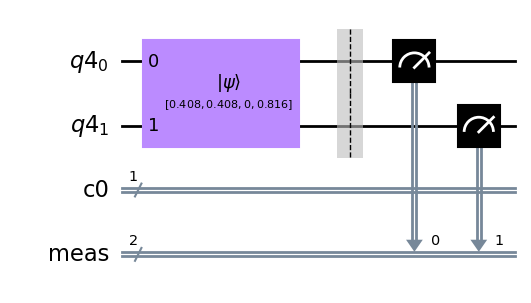

In [ ]:
qc.draw("mpl")

### **circuit**


we have a circuit with one classical output qubit and two other qubit.we apply two consecutive H gate to the first qubit.and we apply x h h to the second qubit.

we put a barrier to isolate this part of the circuit and at last we measure the circuit and put the result in c.

for example if we have zero in qubit one and two this will be the output

for first qubit we apply a h gate so the output will be bra + ket.
and if we apply h to bra + ket it will be bra 0 ket again.

for the second qubit if we have 0 in it the output will be bra 1 ket.
if we apply h to bra 1 ket it will become bra - ket
and if we apply h to - it will be come minus of bra - ket,

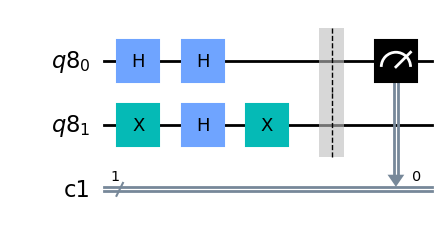

In [ ]:
q=QuantumRegister(2)
c=ClassicalRegister(1)
qc=QuantumCircuit(q,c)

qc.h(0)
qc.h(0)
qc.x(1)
qc.h(1)
qc.x(1)
qc.barrier()
qc.measure(0, c)
qc.draw('mpl')

### **QNN**

In [ ]:
from sklearn import *

iris=datasets.load_iris()
X=iris.data[0:100]
Y=iris.target[0:100]
X_train, X_test, Y_train, Y_test=model_selection.train_test_split(X,Y,test_size=0.20, random_state=42)
print(Y_train)

[1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1
 0 1 1 0 1 1]


In [ ]:
N=4

The qc.rx(x, i) line applies the Rx gate with the angle x to the i-th qubit in the circuit.
By varying the angles, you can create different quantum states and perform specific operations.

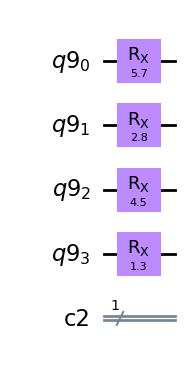

In [ ]:
q=QuantumRegister(N)
c=ClassicalRegister(1)
qc=QuantumCircuit(q,c)

for i, x in enumerate(X_train[0]):
  qc.rx(x,i)

qc.draw('mpl')

In [ ]:
X_train[0]

array([5.7, 2.8, 4.5, 1.3])

We define a quantum register (q) and a classical register (c) using QuantumRegister and ClassicalRegister.
The number of qubits in the quantum register (N) needs to be specified based on the number of features in the dataset (assuming each feature corresponds to a qubit).

applying Rx Gates:
The loop iterates over the features of the first training sample (X_train[0]).
For each feature, an Rx gate is applied to the corresponding qubit in the quantum circuit.
The Rx gate rotates the qubit state around the X-axis on the Bloch sphere by an angle determined by the feature value.

In [ ]:
def feature_map(X):
 q=QuantumRegister(N)
 c=ClassicalRegister(1)
 qc=QuantumCircuit(q,c)
 for i, x in enumerate(X):
  qc.rx(x,i)
 return qc, c


This loop iterates over qubits from 0 to N-2.

For each qubit, it applies a controlled-X (CNOT) gate between qubit i and qubit i+1.

The CNOT gate flips the target qubit (i+1) if the control qubit (i) is in state |1⟩.

 qc.cnot(N-1, 0)
This line applies a CNOT gate between the last qubit (index N-1) and the first qubit (index 0).

It ensures that the quantum state is entangled across the entire circuit.

cfor i in range(N):

This loop iterates over all qubits (from 0 to N-1).
For each qubit, it applies a rotation gate around the y-axis (denoted as ry(theta[i], i)).
The ry gate introduces a rotation by an angle specified by theta[i].



In [ ]:
def variational_circuit (qc,theta):
  for i in range(N-1):
    qc.cnot(i,i+1)

  qc.cnot(N-1,0)
  for i in range(N):
      qc.ry(theta[i],i)
  return qc

here we feature map our example.we put a barrier to isolate it from the other parts.we initialize the varitional circuit and we measure the circuit.then we simulate the circuit and count one in it.

In [ ]:
qc,c=feature_map(X_train[6])
qc.barrier()
qc=variational_circuit(qc,np.random.rand(N))
qc.barrier()
qc.measure(0,c)
shots=1E5
backend=Aer.get_backend('qasm_simulator')
job=execute(qc,backend, shots=shots)
result=job.result()
counts=result.get_counts(qc)
print(counts)
print(counts['1']/shots)
qc.draw('mpl')

the result is not right because we haven't train the mode yet!.let's train the model

In [ ]:
print(Y_train[6])

0


here we initialize our qnn.using shot we run the circuit for so man times to be sure of the results

In [ ]:
def quantum_nn(X, theta, simulator =True):
 qc,c=feature_map(X)
 qc=variational_circuit(qc,theta)
 qc.measure(0,c)

 shots=1E5
 backend=Aer.get_backend('qasm_simulator')
 job=execute(qc,backend, shots=shots)
 result=job.result()
 counts=result.get_counts(qc)
 return counts['1']/shots


our loss function is by squaring the loss minus prediction powerd by two

In [ ]:
def loss(prediction, target):
    return(prediction-target)**2

X represents the input data.

Y represents the target output.

theta is a list of adjustable parameters (quantum gates’ angles or other parameters).

delta is a small value used for finite differences.

grad will store the computed gradients.

pred1 = quantum_nn(X, dtheta):

Computes the QNN prediction using modified parameters dtheta.

quantum_nn likely represents the QNN model, which processes the input data X with the adjusted parameters.

The modified parameters dtheta are obtained by adding a small delta (delta) to the original parameters theta.

pred2 = quantum_nn(X, theta):

Computes the QNN prediction using the original parameters theta.

This represents the QNN prediction without any parameter modifications.

grad.append((loss(pred1, Y) - loss(pred2, Y)) / delta)

In [ ]:
import copy
def gradient(X,Y, theta):
  delta=0.01
  grad=[]
  for i in range(len(theta)):
    dtheta=copy.copy(theta)
    dtheta[i] +=delta
    pred1=quantum_nn(X, dtheta)
    pred2=quantum_nn(X, theta)
    grad.append((loss(pred1, Y)-loss(pred2, Y))/delta)
    return np.array(grad)

here we put the threshhold 0.5.the label should be 1 if the prediction is more than 0.5 and should be 0 if the prediction is lower than 0.5.so for each example that satisfies the condition we add 1 to the number of correct examples and then we divide it by total number of dataset

In [ ]:
def accuracy (X,Y, theta):

    counter=0
    for X_i, Y_i in zip(X, Y):
        prediction=quantum_nn(X_i, theta)

        if prediction<0.5 and Y_i==0:
             counter+=1
        elif prediction>=0.5 and Y_i==1:
              counter+=1
    return counter/len(Y)

here we ran the algorithm for 18 epochs.in each epoch we save the loss and add it to the loss list.then we use gradient function to calculate the optimum theta for our model.

np.ones is for the dimension of the theta.because we have 4 features and the matrix should multiplied by it it has have 4*1

In [ ]:
eta=0.03
loss_list=[]
theta= np.ones(N)

print('Epoch\t Loss\t Training Accuracy')

for i in range(18):
  loss_tmp=[]
  for X_i, Y_i in zip( X_train, Y_train):
    prediction=quantum_nn(X_i, theta)
    loss_tmp.append(loss(prediction,Y_i))
    theta=theta-eta*gradient(X_i, Y_i, theta)

  loss_list.append(np.mean(loss_tmp))
  acc=accuracy(X_train, Y_train, theta)
  print(f'{i} \t {loss_list[-1]:.3f} \t {acc:.3f}')

Epoch	 Loss	 Training Accuracy


<ipython-input-86-78d5960a0ade>:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i,i+1)
<ipython-input-86-78d5960a0ade>:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1,0)


0 	 0.281 	 0.150
1 	 0.278 	 0.188
2 	 0.271 	 0.200
3 	 0.263 	 0.212
4 	 0.253 	 0.725
5 	 0.242 	 0.800
6 	 0.238 	 0.812
7 	 0.237 	 0.812
8 	 0.230 	 0.812
9 	 0.225 	 0.825
10 	 0.222 	 0.800
11 	 0.218 	 0.812
12 	 0.213 	 0.800
13 	 0.210 	 0.812
14 	 0.209 	 0.838
15 	 0.207 	 0.800
16 	 0.206 	 0.825
17 	 0.205 	 0.838


<function matplotlib.pyplot.show(close=None, block=None)>

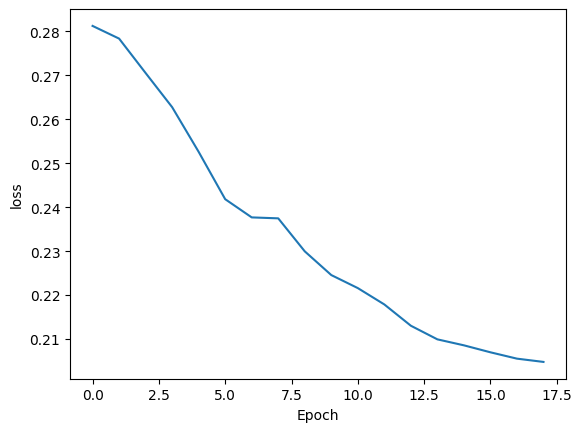

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show


In [ ]:
accuracy(X_test,Y_test,theta)

<ipython-input-86-78d5960a0ade>:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i,i+1)
<ipython-input-86-78d5960a0ade>:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1,0)


0.8

In [ ]:
quantum_nn(X_test[7], theta, simulator=False)

<ipython-input-86-78d5960a0ade>:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i,i+1)
<ipython-input-86-78d5960a0ade>:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1,0)


0.62084

In [ ]:
Y_test[7]

1